### **1. Personal Information**

**Name:** Xander Akiko Snelder

**StudentID:** 11598727

**Email:** [xander.snelder2@student.uva.nl](xander.snelder2@student.uva.nl)

**Submitted on:** 22-04-2024

**Github:** https://github.com/XanderSnelder/master-thesis

### **2. Data Context**

#### **2.1. English SimLex-999**

In 2015, the SimLex-999 dataset was introduced and became a gold standard for measuring semantic similarities between English word pairs. This study differentiates between similarity and association of words, emphasizing that these concepts are not mutually exclusive or independent. Semantic similarity refers to how much two words share common characteristics. Semantic association, also known as semantic relatedness, contains a broader range of associations between words. This includes how frequent words interact or co-occur in practical situations. SimLex-999 is developed with the help of 500 native English speakers from the United States and contains 999 word pairs, where each pair has been rated for similarity by approximately 50 annotators. The annotation process was conducted through the crowdsourcing marketplace Amazon Mechanical Turk (MTurk).

https://doi.org/10.48550/arXiv.1408.3456

#### **2.2. Dutch SimLex-999**

Based on SimLex-999, variations have been developed that focus on different aspects or shortcomings of the original version. In 2024, the Dutch SimLex-999 has been developed with the help of 235 native Dutch speakers. The English words were translated into Dutch, while ensuring they matched their original semantics. The German SimLex-999 was referenced because of its linguistic similarities with Dutch. Each word pair was rated by 15 annotators on a scale from 0 to 10, and the averages were used as final scores.

#### **2.3. Description of Columns**

##### **2.3.1. English SimLex-999**

The English SimLex-999 dataset contains the following columns:

* **word1:** First word in the pair.

* **word2:** Second word in the pair.

* **POS:** Part-Of-Speech (POS) of the word pairs. 'N' stands for nouns, 'V' for verbs, and 'A' for adjectives.

* **SimLex999:** Core of the dataset. Similarity scores represent how similar two words are in meaning, judged by human annotators. The scores range from 0 (no similarity) to 10 (high similarity).

* **conc(w1):** Conceptual concreteness scores of the first word, ranging from 1 (highly abstract) to 5 (highly concrete). Concreteness indicates how tangible or concrete a word is, as opposed to abstract. Extracted from USF Free Association Norms.

* **conc(w2):** Same as conc(w1), but for the second word in the pair.

* **concQ:** Concreteness of the word pairs categorized into quartiles (1-4).

* **Assoc(USF):** Association/relatedness scores ranging from 0 (no association) to 10 (high association). Extracted from USF Free Association Norms.

* **SimAssoc333:** Binary indicator used for a subset of the 333 most associated word pairs in SimLex-999, according to USF Association Norms.

* **SD(SimLex):** Standard deviation of the SimLex999 similarity ratings, indicating the variability of the human judgements for each word pair.

https://fh295.github.io//simlex.html

##### **2.3.2. Dutch SimLex-999**

The description of columns for the Dutch SimLex-999 are similar, except that this dataset does not contain the association and concreteness scores extracted from the USF Free Association Norms.

### **3. Data Description and Analysis**

Both datasets are relatively small and straightforward, and there is no need for extensive data cleaning or processing. The only data processing step is enriching the Dutch SimLex-999 dataset with additional columns.

#### **3.1. Set-up**

In [1]:
# Import libraries and utils
%run '../eda/utils.ipynb'

In [2]:
# Load data
en_simlex = pd.read_csv("../data/dataset/en-simlex-999.txt", delimiter='\t')
nl_simlex_raw = pd.read_csv("../data/dataset/nl-simlex-999.txt", delimiter='\t')
nl_simlex_questionnaire = pd.read_csv("../data/dataset/nl-simlex-999-questionnaire.csv")

In [3]:
# Drop redundant columns
nl_simlex_questionnaire.drop(columns=['POS'], inplace=True)

# Rename SimLex columns
en_simlex = en_simlex.rename(columns={'SimLex999': 'en_sl'})
nl_simlex_raw = nl_simlex_raw.rename(columns={'SimLex999': 'nl_sl'})
nl_simlex_questionnaire = nl_simlex_questionnaire.rename(columns={'Simlex999': 'nl_sl'})

# Rename Standard Deviation Columns
nl_simlex_questionnaire = nl_simlex_questionnaire.rename(columns={'Std Deviation': 'nl_sd'})
en_simlex = en_simlex.rename(columns={'SD(SimLex)': 'en_sd'})

In [4]:
# Enrich Dutch SimLex with standard deviation, variance, and count
nl_simlex = pd.merge(nl_simlex_raw, nl_simlex_questionnaire, on=['word1', 'word2', 'nl_sl'], how='left') # also join on nl_simlex because of duplicate word pairs

# Rename column for consistency between datasets
nl_simlex = nl_simlex.rename(columns={'Std Deviation': 'SD(SimLex)'})

In [5]:
# Select columns
nl_simlex = nl_simlex[['word1', 'word2', 'nl_sl', 'nl_sd', 'POS']]
en_simlex = en_simlex[['word1', 'word2', 'en_sl', 'en_sd', 'POS']]

#### **3.2. Initial Overview**

##### **3.2.1. Dutch SimLex-999**

In [6]:
# Summary of dataset
nl_simlex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   word1   999 non-null    object 
 1   word2   999 non-null    object 
 2   nl_sl   999 non-null    float64
 3   nl_sd   999 non-null    float64
 4   POS     999 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.8+ KB


In [7]:
# First 5 rows
nl_simlex.head()

,word1,word2,nl_sl,nl_sd,POS
0,oud,nieuw,1.94,2.42,A
1,slim,intelligent,8.19,1.54,A
2,hard,moeilijk,4.46,3.18,A
3,gelukkig,vrolijk,6.49,2.15,A
4,hard,stoer,5.69,2.94,A


In [8]:
# Last 5 rows
nl_simlex.tail()

,word1,word2,nl_sl,nl_sd,POS
994,samenvoegen,verwerven,3.89,3.11,V
995,sturen,bijwonen,1.85,1.95,V
996,verzamelen,bijwonen,1.06,1.71,V
997,opnemen,intrekken,2.29,2.67,V
998,bijwonen,aankomen,1.32,1.05,V


In [9]:
# Count of rows
nl_simlex.count()

word1    999
word2    999
nl_sl    999
nl_sd    999
POS      999
dtype: int64

In [10]:
# Data types
nl_simlex.dtypes

word1     object
word2     object
nl_sl    float64
nl_sd    float64
POS       object
dtype: object

In [11]:
# Missing values per column
nl_simlex.isnull().sum()

word1    0
word2    0
nl_sl    0
nl_sd    0
POS      0
dtype: int64

In [12]:
# Counts of values in categorical column 'POS'
nl_simlex['POS'].value_counts()

N    666
V    222
A    111
Name: POS, dtype: int64

##### **3.2.2. English SimLex-999**

In [13]:
# Summary of dataset
en_simlex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   word1   999 non-null    object 
 1   word2   999 non-null    object 
 2   en_sl   999 non-null    float64
 3   en_sd   999 non-null    float64
 4   POS     999 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.1+ KB


In [14]:
# First 5 rows
en_simlex.head()

,word1,word2,en_sl,en_sd,POS
0,old,new,1.58,0.41,A
1,smart,intelligent,9.20,0.67,A
2,hard,difficult,8.77,1.19,A
3,happy,cheerful,9.55,2.18,A
4,hard,easy,0.95,0.93,A


In [15]:
# Last 5 rows
en_simlex.tail()

,word1,word2,en_sl,en_sd,POS
994,join,acquire,2.85,0.99,V
995,send,attend,1.67,1.44,V
996,gather,attend,4.80,1.97,V
997,absorb,withdraw,2.97,1.75,V
998,attend,arrive,6.08,1.18,V


In [16]:
# Count of rows
en_simlex.count()

word1    999
word2    999
en_sl    999
en_sd    999
POS      999
dtype: int64

In [17]:
# Data types
en_simlex.dtypes

word1     object
word2     object
en_sl    float64
en_sd    float64
POS       object
dtype: object

In [18]:
# Missing values per column
en_simlex.isnull().sum()

word1    0
word2    0
en_sl    0
en_sd    0
POS      0
dtype: int64

In [19]:
# Count of values in categorical column 'POS'
en_simlex['POS'].value_counts()

N    666
V    222
A    111
Name: POS, dtype: int64

#### **3.3. Descriptive Statistics**

In [20]:
# Summary statistics SimLex-999
nl_sl_summary = round(nl_simlex['nl_sl'].describe(), 2)
en_sl_summary = round(en_simlex['en_sl'].describe(), 2)

# Add median SimLex-999
nl_sl_summary['median'] = round(nl_simlex['nl_sl'].median(), 2)
en_sl_summary['median'] = round(en_simlex['en_sl'].median(), 2)

# Summary statistics standard deviations
nl_sd_summary = round(nl_simlex['nl_sd'].describe(), 2)
en_sd_summary = round(en_simlex['en_sd'].describe(), 2)

# Add median standard deviation
nl_sd_summary['median'] = round(nl_simlex['nl_sd'].median(), 2)
en_sd_summary['median'] = round(en_simlex['en_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_sl": nl_sl_summary,
    "en_sl": en_sl_summary,
    "nl_sd": nl_sd_summary,
    "en_sd": en_sd_summary
})

# Show results
summary_df

,nl_sl,en_sl,nl_sd,en_sd
count,999.00,999.00,999.00,999.00
mean,3.65,4.56,2.37,1.27
std,2.00,2.61,0.64,0.37
min,0.49,0.23,0.48,0.34
25%,2.00,2.38,2.00,1.08
50%,3.27,4.67,2.46,1.31
75%,5.08,6.75,2.84,1.54
max,9.28,9.80,4.13,2.18
median,3.27,4.67,2.46,1.31


In [21]:
# Rename columns and copy
renamed_nl_simlex = nl_simlex.rename(columns={"nl_sl": "SimLex-999", "nl_sd": "Standard Deviation"}).copy()
renamed_en_simlex = en_simlex.rename(columns={"en_sl": "SimLex-999", "en_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_simlex['Language'] = 'NL'
renamed_en_simlex['Language'] = 'EN'

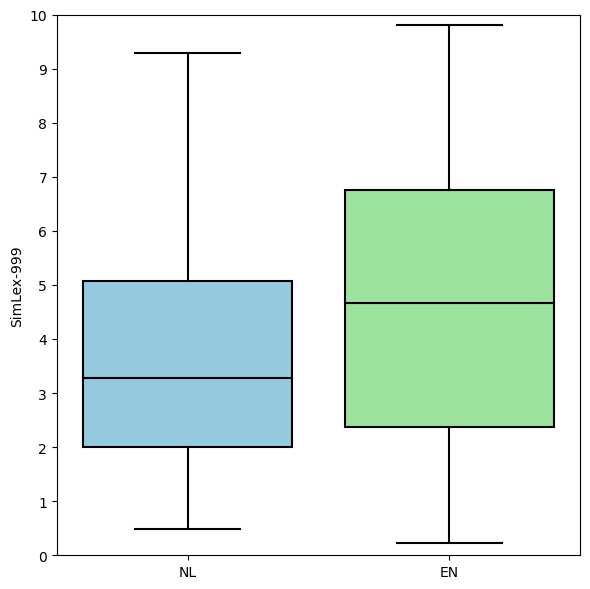

In [22]:
# Create dummy label
renamed_nl_simlex['Language'] = 'NL'
renamed_en_simlex['Language'] = 'EN'

# Combine the two DataFrames
combined_data = pd.concat([renamed_nl_simlex, renamed_en_simlex])

# Creating the boxplot with specified colors
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Language',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

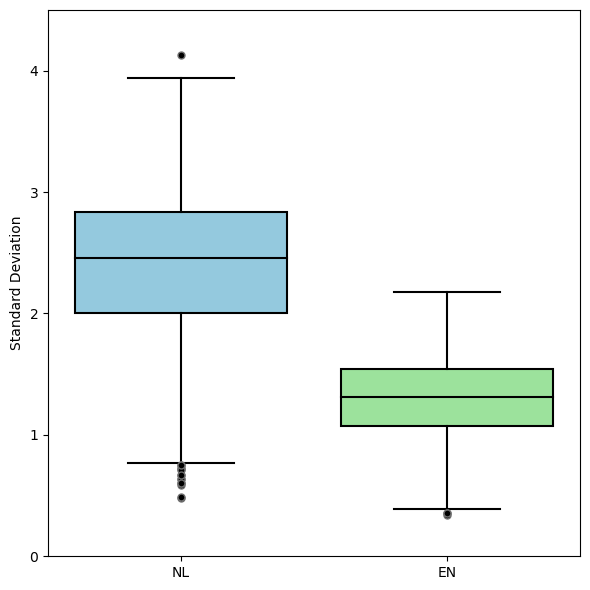

In [23]:


# Combine the two DataFrames
combined_data = pd.concat([renamed_nl_simlex, renamed_en_simlex])

# Creating the boxplot with specified colors
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Language',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 4.5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.4. Numerical Data Distribution**

##### **3.4.1. Dutch SimLex-999**

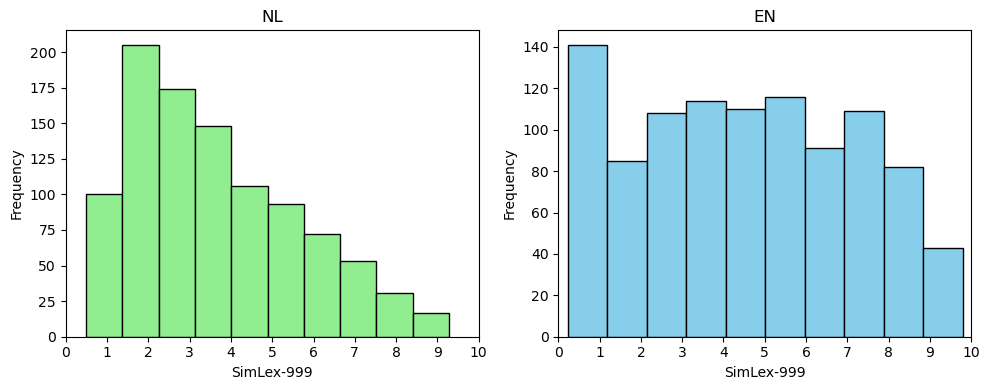

In [24]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Plotting NL histogram
axes[0].hist(renamed_nl_simlex['SimLex-999'], bins=10, edgecolor='black', color='lightgreen')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plotting EN histogram
axes[1].hist(renamed_en_simlex['SimLex-999'], bins=10, edgecolor='black', color='skyblue')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

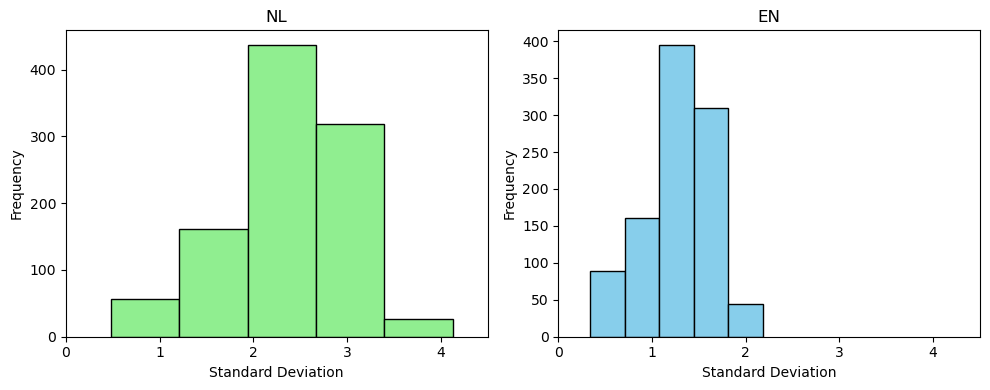

In [25]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 4.5

# Plotting the NL histogram
axes[0].hist(renamed_nl_simlex['Standard Deviation'], bins=5, edgecolor='black', color='lightgreen')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plotting the EN histogram
axes[1].hist(renamed_en_simlex['Standard Deviation'], bins=5, edgecolor='black', color='skyblue')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.5. Outliers**

##### **3.5.1. Dutch SimLex-999**

In [26]:
print_outlier_counts(nl_simlex)

Outliers in nl_sd: 15
No outliers found in columns: nl_sl


In [27]:
print_outlier_data(nl_simlex, 'nl_sd')


Outliers in nl_sd:
         word1        word2  nl_sl  nl_sd POS
125      vrouw          man   5.08   4.13   N
155   boosheid        woede   8.87   0.59   N
178     straat         auto   0.89   0.72   N
293      water         zout   0.87   0.64   N
452       doos         lift   0.79   0.73   N
731       muis       beheer   0.82   0.67   N
734       taak       rietje   0.83   0.60   N
738    pistool         truc   0.94   0.75   N
744  volkslied       rietje   0.87   0.71   N
755   maaltijd       staart   0.49   0.48   N
757     likeur  muziekgroep   0.85   0.49   N
759    pistool         bont   0.99   0.64   N
821   besteden       redden   1.06   0.75   V
867      geven     weigeren   0.90   0.67   V
918    negeren       vragen   0.76   0.60   V


##### **3.5.2. English SimLex-999**

In [28]:
print_outlier_counts(en_simlex)

Outliers in en_sd: 3
No outliers found in columns: en_sl


In [29]:
print_outlier_data(en_simlex, 'en_sd')


Outliers in en_sd:
         word1      word2  en_sl  en_sd POS
12        easy  difficult   0.58   0.36   A
727       task      woman   0.68   0.34   N
984  cooperate       join   5.18   0.36   V


##### **3.5.1 Add to Summary**

In [30]:
# Calculate outliers
outliers_nl_sl = calculate_outliers(nl_simlex, 'nl_sl')
outliers_nl_sd = calculate_outliers(nl_simlex, 'nl_sd')
outliers_en_sl = calculate_outliers(en_simlex, 'en_sl')
outliers_en_sd = calculate_outliers(en_simlex, 'en_sd')

# Count outliers
count_outliers_nl_sl = outliers_nl_sl.shape[0]
count_outliers_nl_sd = outliers_nl_sd.shape[0]
count_outliers_en_sl = outliers_en_sl.shape[0]
count_outliers_en_sd = outliers_en_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_sl, count_outliers_nl_sd, count_outliers_en_sl, count_outliers_en_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_sl,en_sl,nl_sd,en_sd
count,999.00,999.00,999.00,999.00
mean,3.65,4.56,2.37,1.27
std,2.00,2.61,0.64,0.37
min,0.49,0.23,0.48,0.34
25%,2.00,2.38,2.00,1.08
50%,3.27,4.67,2.46,1.31
75%,5.08,6.75,2.84,1.54
max,9.28,9.80,4.13,2.18
median,3.27,4.67,2.46,1.31
outliers,0.00,15.00,0.00,3.00


#### **3.6. Categorical Data Distributions**

##### **3.6.1. Dutch SimLex-999**

In [31]:
# Import libraries and utils
%run '../eda/utils.ipynb'

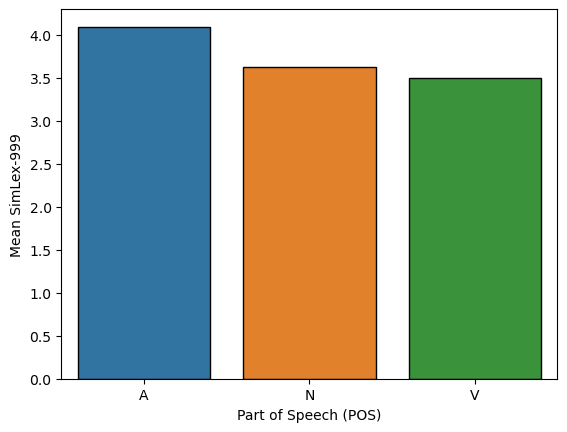

POS
A    4.09
N    3.63
V    3.50
Name: SimLex-999, dtype: float64


In [32]:
# Plot the mean similarity score aggregated by POS
plot_feature_by_pos(renamed_nl_simlex, 'SimLex-999')

# Calculate mean per POS
print_mean_per_pos(renamed_nl_simlex, 'SimLex-999')

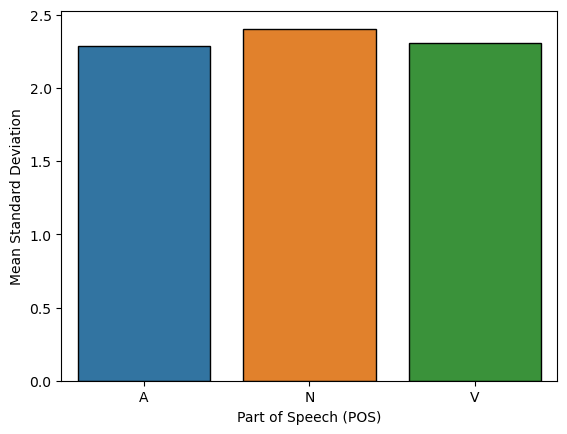

POS
A    2.29
N    2.41
V    2.31
Name: Standard Deviation, dtype: float64


In [33]:
# Plot the mean standard deviation aggregated by POS
plot_feature_by_pos(renamed_nl_simlex, 'Standard Deviation')

# Calculate mean per POS
print_mean_per_pos(renamed_nl_simlex, 'Standard Deviation')

##### **3.6.2. English SimLex-999**

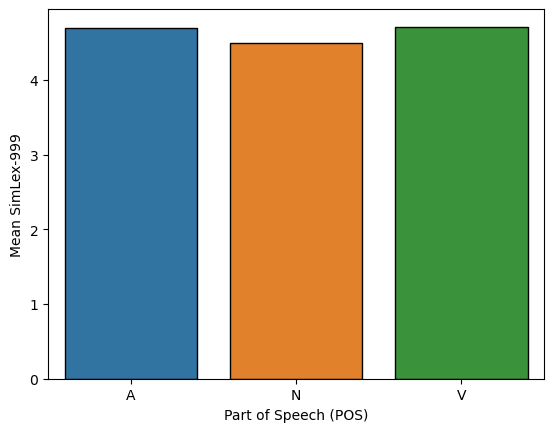

POS
A    4.70
N    4.49
V    4.71
Name: SimLex-999, dtype: float64


In [34]:
# Plot the mean similarity score aggregated by POS
plot_feature_by_pos(renamed_en_simlex, 'SimLex-999')

# Calculate mean per POS
print_mean_per_pos(renamed_en_simlex, 'SimLex-999')

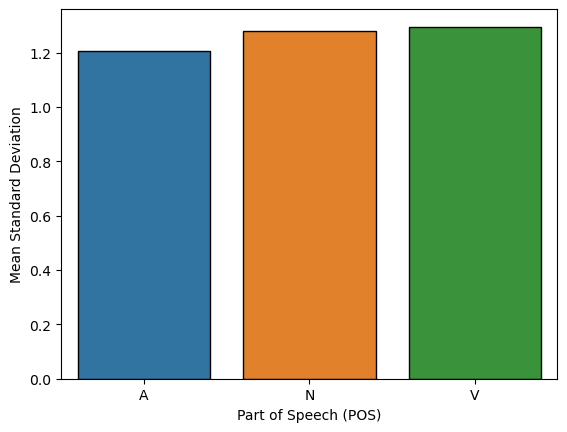

POS
A    1.21
N    1.28
V    1.30
Name: Standard Deviation, dtype: float64


In [35]:
# Plot the mean standard deviation aggregated by POS
plot_feature_by_pos(renamed_en_simlex, 'Standard Deviation')

# Calculate mean per POS
print_mean_per_pos(renamed_en_simlex, 'Standard Deviation')

#### **3.7. Correlations**

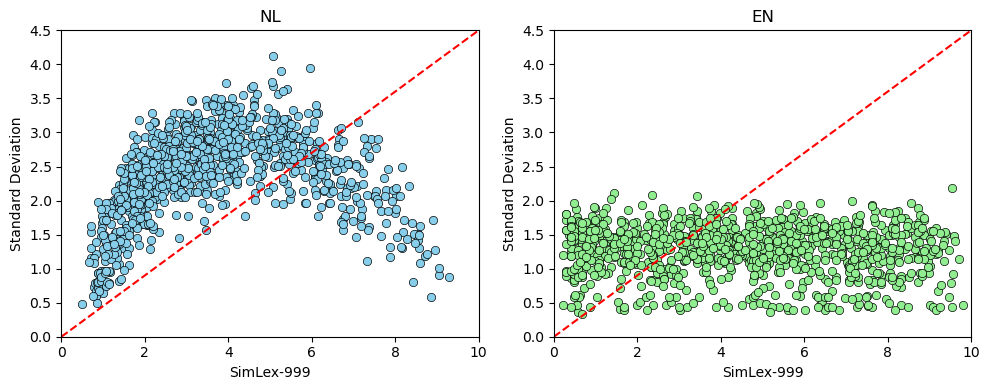

In [36]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 4.5

# Create scatter plot
sns.scatterplot(x='nl_sl', y='nl_sd', data=nl_simlex, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_sl', y='en_sd', data=en_simlex, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [37]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(nl_simlex, 'nl_sl', 'nl_sd'))
correlations_list.append(calculate_correlation_and_pvalue(en_simlex, 'en_sl', 'en_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_sl,nl_sd,0.37779,3.035459e-35,significant
1,en_sl,en_sd,-0.04859,1.248691e-01,not significant
